In [1]:
# Prerequisities
# conda create -n tensorflow python=3.5
# activate tensorflow
# pip install --ignore-installed --upgrade tensorflow

In [10]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np 
import tensorflow as keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [15]:
# its important to split the training and testing - Data set is stored in the path specified. 
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [16]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [17]:
# We shall build the model here! 
# Simple CNN shall do the task, You can try other tech as well. 
# Try with other activation functions also. 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [18]:
# It is time to compile the model, let us compile. 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
# let's get the model fit. 
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)
# Epochs you can vary! 

Epoch 1/5
58/58 [==============================] - 45s 758ms/step - loss: 0.3070 - accuracy: 0.8755 - val_loss: 0.3710 - val_accuracy: 0.8676
Epoch 2/5
58/58 [==============================] - 44s 758ms/step - loss: 0.1409 - accuracy: 0.9580 - val_loss: 0.5739 - val_accuracy: 0.8529
Epoch 3/5
58/58 [==============================] - 45s 769ms/step - loss: 0.1520 - accuracy: 0.9498 - val_loss: 0.3518 - val_accuracy: 0.8676
Epoch 4/5
58/58 [==============================] - 45s 766ms/step - loss: 0.1263 - accuracy: 0.9656 - val_loss: 1.2784 - val_accuracy: 0.8088
Epoch 5/5
58/58 [==============================] - 45s 767ms/step - loss: 0.1332 - accuracy: 0.9574 - val_loss: 0.1610 - val_accuracy: 0.9412


In [20]:
# Can we work on the testing dataset, the predictions happen here. 
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 140ms/step


In [21]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [22]:

print(len(predictions))

68


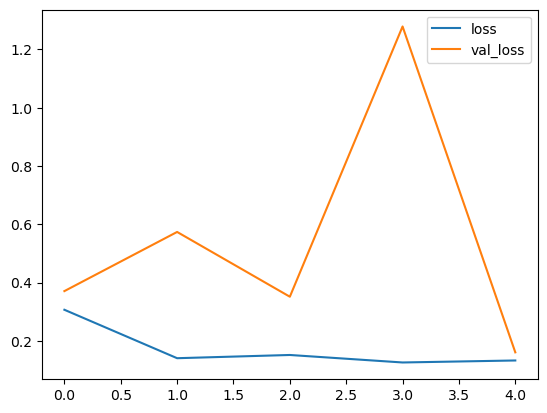

In [23]:
# it's time to plot it! Lets plot loss. 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

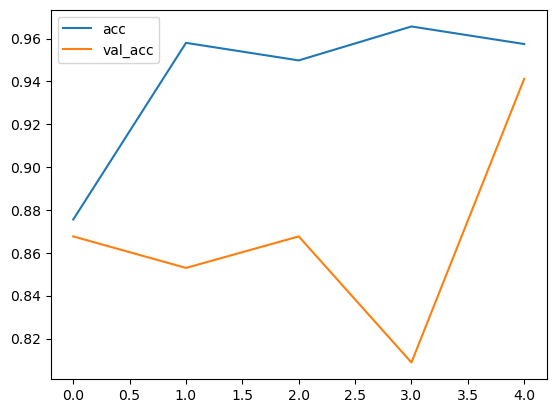

In [24]:
# How much accurate it is? 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# This helps in taking individual images from the Dataset, load and check results. 
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 114ms/step
[[0.]]


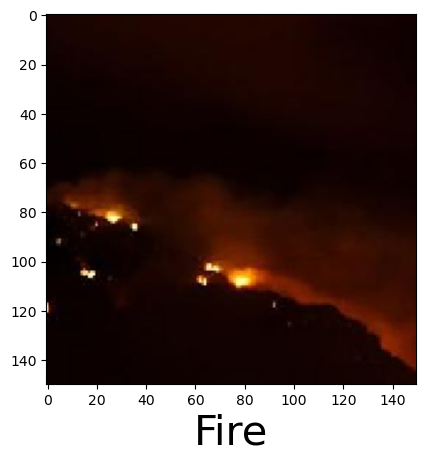

In [26]:
predictImage("/forest_fire/Testing/fire/abc172.jpg")

1/1 [==============================] - 0s 37ms/step
[[0.]]


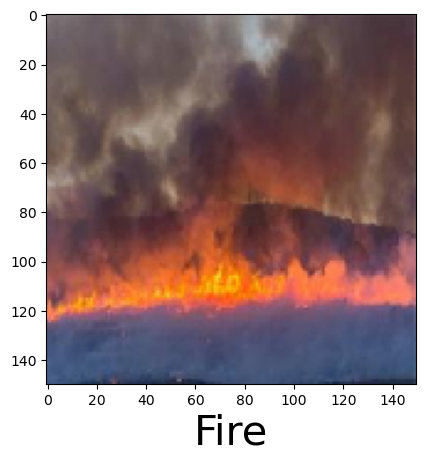

In [27]:
predictImage("/forest_fire/Testing/fire/abc178.jpg")

1/1 [==============================] - 0s 40ms/step
[[1.]]


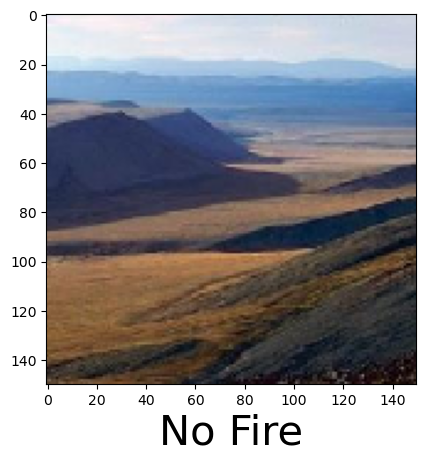

In [29]:
predictImage('/forest_fire/Testing/nofire/abc347.jpg')

1/1 [==============================] - 0s 39ms/step
[[1.]]


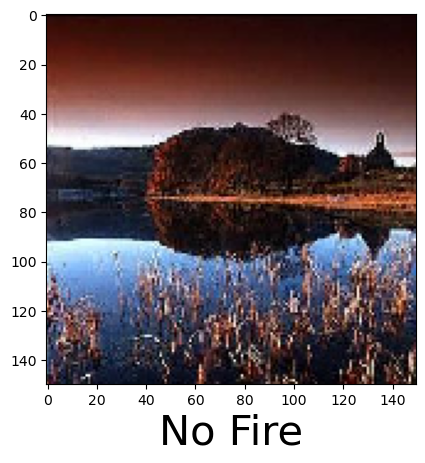

In [30]:

predictImage('/forest_fire/Testing/nofire/abc367.jpg')

1/1 [==============================] - 0s 25ms/step
[[0.]]


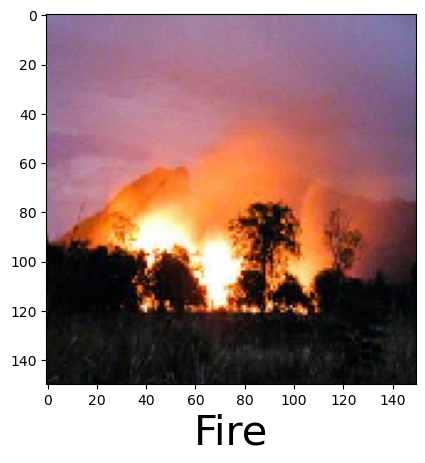

In [31]:
predictImage('/abc183.jpg')